In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
from matplotlib import rcParams, cycler


In [2]:
decode_for = 'stim'

In [3]:
base_path =  '/home/rudy/Python3/cluster/'
file_path = base_path +'wavelet/' 
file_name = 'pval_all_sess_'+ decode_for + '.csv'

df = pd.read_csv(file_path + file_name)

In [4]:
only_correct_trials = True
df = df[ (df.only_correct_trials == only_correct_trials) & (df.decode_for == decode_for)]

In [5]:
df

,session,decode_for,only_correct_trials,interval,interval_name,areas,cortex,elec_type,mean_per_class_accuracy,error_bar,pval,sign,data_size,n_chans,window_size,n_splits,seed
1777,141014,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['AIP', 'LIP', 'TPt', 'a5', 'a7A', 'a7B', 'DP'...",All,grid,0.222640,0.022077,3.223258e-01,0,334,62,500,5,Unknow
1778,141015,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['AIP', 'LIP', 'TPt', 'a5', 'a7A', 'a7B', 'DP'...",All,grid,0.238929,0.022227,6.900985e-02,0,351,72,500,5,Unknow
1779,141016,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['AIP', 'LIP', 'TPt', 'a5', 'a7A', 'a7B', 'DP'...",All,grid,0.214542,0.021355,5.007440e-01,0,346,96,500,5,Unknow
1780,141017,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['AIP', 'PIP', 'TPt', 'a5', 'a7A', 'a7B', 'DP'...",All,grid,0.218458,0.022018,4.055820e-01,0,332,94,500,5,Unknow
1781,141023,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['AIP', 'LIP', 'TPt', 'a5', 'a7A', 'a7B', 'DP'...",All,grid,0.229682,0.017725,8.970653e-02,0,532,106,500,5,Unknow
1782,141024,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['AIP', 'LIP', 'TPt', 'a5', 'a7B', 'DP', 'MT',...",All,grid,0.198239,0.016329,9.170992e-01,0,582,104,500,5,Unknow
1783,141029,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['a5', 'a7B', 'DP', 'MT', 'V1', 'V2', 'V4t', '...",All,grid,0.204765,0.020091,8.151488e-01,0,400,56,500,5,Unknow
1784,141103,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['AIP', 'a5', 'a7B', 'DP', 'MT', 'V1', 'V2', '...",All,grid,0.198322,0.021930,9.404420e-01,0,330,88,500,5,Unknow
1785,141112,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['LIP', 'TPt', 'a5', 'a7B', 'DP', 'MT', 'V1', ...",All,grid,0.227279,0.018798,1.379513e-01,0,476,84,500,5,Unknow
1786,141113,stim,True,align_onmatchfrom_time-500to_time0,delay-end,"['AIP', 'LIP', 'TPt', 'a5', 'a7A', 'a7B', 'DP'...",All,grid,0.198102,0.016644,9.119671e-01,0,584,81,500,5,Unknow


In [6]:
df.keys()

Index(['session', 'decode_for', 'only_correct_trials', 'interval',
       'interval_name', 'areas', 'cortex', 'elec_type',
       'mean_per_class_accuracy', 'error_bar', 'pval', 'sign', 'data_size',
       'n_chans', 'window_size', 'n_splits', 'seed'],
      dtype='object')

In [7]:
session = np.unique(df.session)
print('list of sessions :')
print(session)


list of sessions :
[141014 141015 141016 141017 141023 141024 141029 141103 141112 141113
 141125 141126 141127 141128 141202 141203 141205 141208 141209 141211
 141212 141215 141216 141217 141218 150114 150126 150128 150129 150205
 150210 150211 150212 150213 150217 150219 150223 150224 150226 150227
 150302 150303 150304 150305 150403 150407 150408 150413 150414 150415
 150416 150427 150428 150429 150430 150504 150511 150512 150527 150528
 150529 150608]


In [8]:
#intervals = np.unique(df.interval)
intervals = np.unique(df.interval_name)
intervals =['pre-sample', 'sample', 'delay-start', 'delay-end', 'match']
print(intervals)




['pre-sample', 'sample', 'delay-start', 'delay-end', 'match']


In [9]:
cortex = np.unique(df.cortex)
print(cortex)

['All' 'Motor' 'Parietal' 'Prefrontal' 'Somatosensory' 'Visual']


In [10]:
from scipy.stats import ttest_1samp

def metrics(values, pop_mean):
    """Returns mean, pvals (1-sample t-test) and sign for array of values."""
    values = np.array(values).astype('float')
    mean = np.mean(values)
    _, p = ttest_1samp(values, pop_mean)
    sign = '***' if p < .001 else '**' if p < .01 else '*' if p < .05 else 0
    return mean, p, sign

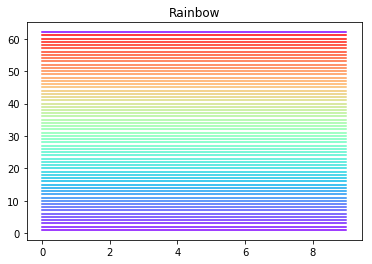

In [18]:

matrix = np.zeros((10,len(df.session.unique())))
for i in range(10):
    for j in range(len(df.session.unique())):
        matrix[i,j] = j+1
          
plt.plot(matrix)
plt.title('Rainbow')
plt.show()

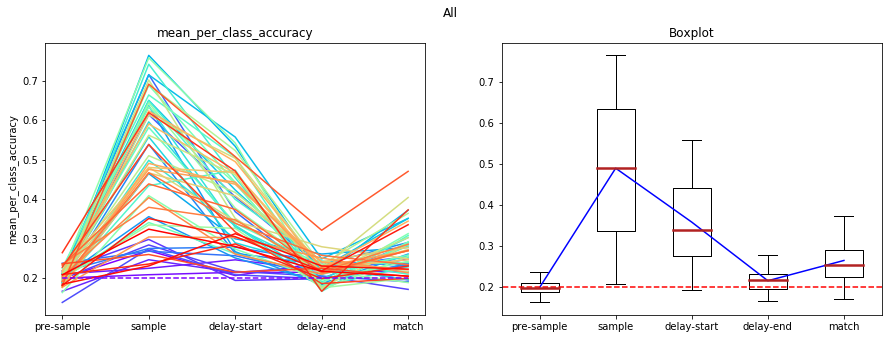

pval as each session would be an observation
[0.8233040156175799, 2.090297089949678e-19, 2.5703478261965414e-17, 8.358467462616472e-05, 9.282366172083885e-12]
sign
[0, '***', '***', '***', '***']


null hypothese : random behavior
reject the null hypothese for R /(number of session) 


alpha :        0.05    0.01    0.001
pre-sample  :  1/59   0/59   0/59
sample      : 55/59   53/59   49/59
delay-start : 48/59   48/59   44/59
delay-end   :  2/59   2/59   2/59
match       : 27/59   26/59   21/59


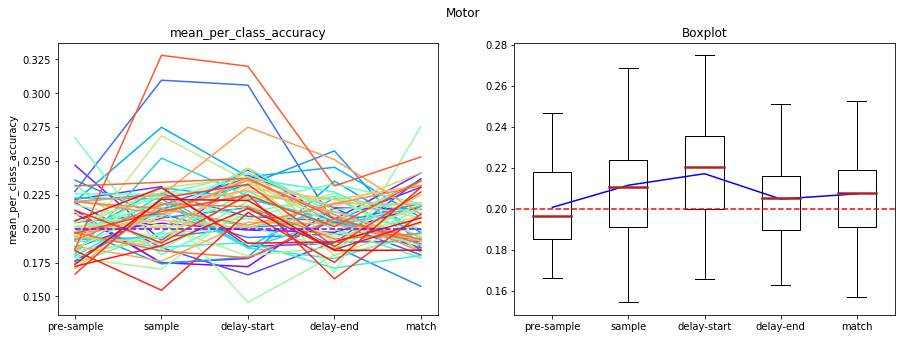

pval as each session would be an observation
[0.7272325543032225, 0.003489342387777433, 2.9889909617811352e-05, 0.05310744329167873, 0.008870045877836514]
sign
[0, '**', '***', 0, '**']


null hypothese : random behavior
reject the null hypothese for R /(number of session) 


alpha :        0.05    0.01    0.001
pre-sample  :  0/61   0/61   0/61
sample      :  4/61   4/61   2/61
delay-start :  3/61   3/61   3/61
delay-end   :  0/61   0/61   0/61
match       :  1/61   1/61   0/61


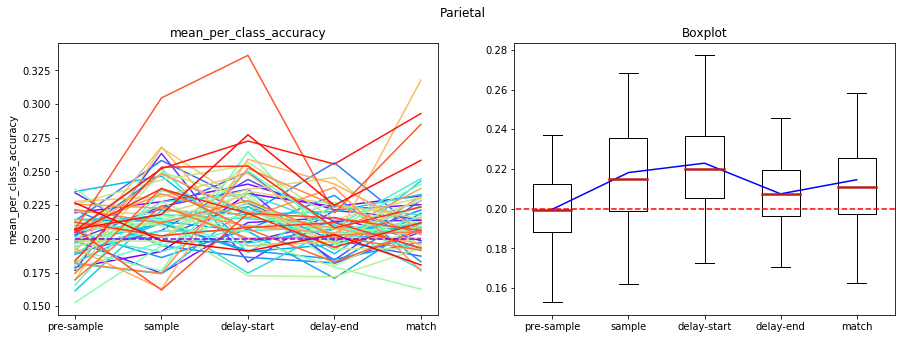

pval as each session would be an observation
[0.9160216921210654, 3.613257196554333e-06, 2.8510334009139683e-08, 0.002535933898528378, 7.24162419001114e-05]
sign
[0, '***', '***', '**', '***']


null hypothese : random behavior
reject the null hypothese for R /(number of session) 


alpha :        0.05    0.01    0.001
pre-sample  :  0/61   0/61   0/61
sample      :  5/61   3/61   2/61
delay-start :  3/61   3/61   3/61
delay-end   :  0/61   0/61   0/61
match       :  4/61   3/61   3/61


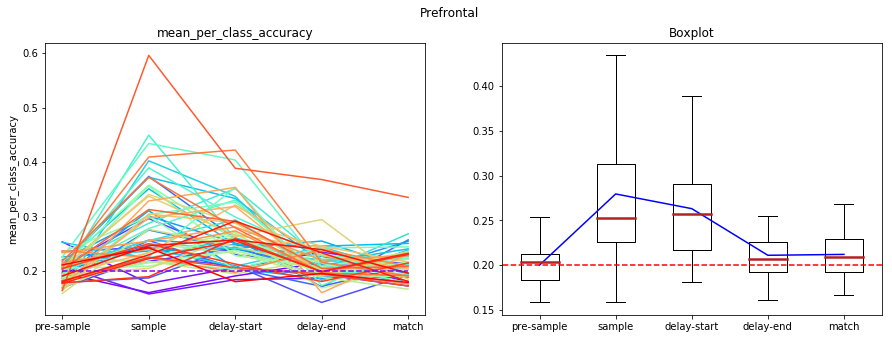

pval as each session would be an observation
[0.9980909019697357, 5.456966765828722e-11, 9.190274186716692e-13, 0.010757997119397001, 0.0016785770089804593]
sign
[0, '***', '***', '*', '**']


null hypothese : random behavior
reject the null hypothese for R /(number of session) 


alpha :        0.05    0.01    0.001
pre-sample  :  0/62   0/62   0/62
sample      : 28/62   27/62   25/62
delay-start : 31/62   25/62   21/62
delay-end   :  2/62   2/62   2/62
match       :  3/62   2/62   1/62


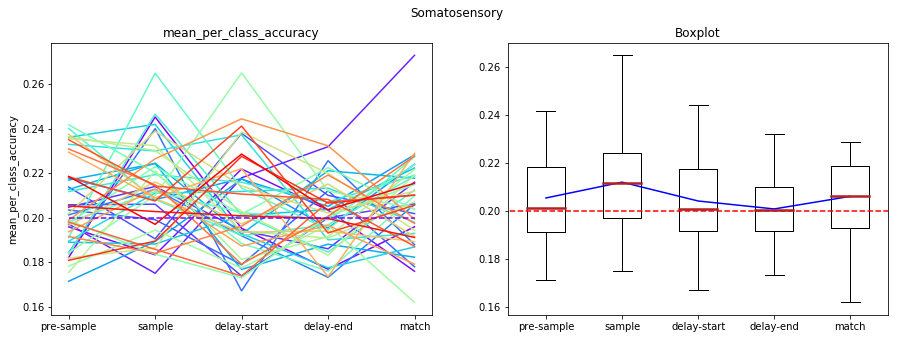

pval as each session would be an observation
[0.07485304459194837, 0.00020973591199808145, 0.21754333597703138, 0.7047239351466803, 0.03706496813570045]
sign
[0, '***', 0, 0, '*']


null hypothese : random behavior
reject the null hypothese for R /(number of session) 


alpha :        0.05    0.01    0.001
pre-sample  :  0/45   0/45   0/45
sample      :  1/45   0/45   0/45
delay-start :  1/45   1/45   0/45
delay-end   :  0/45   0/45   0/45
match       :  1/45   0/45   0/45


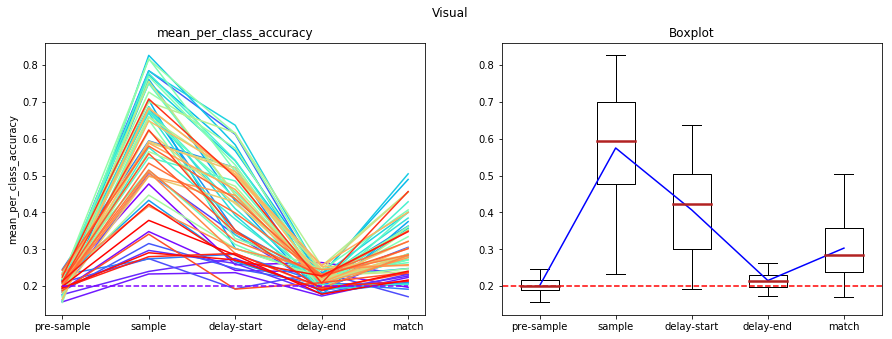

pval as each session would be an observation
[0.6823544387479019, 3.3362996634104106e-25, 7.344546679971423e-20, 9.249390161976363e-07, 1.8381160598449345e-14]
sign
[0, '***', '***', '***', '***']


null hypothese : random behavior
reject the null hypothese for R /(number of session) 


alpha :        0.05    0.01    0.001
pre-sample  :  0/61   0/61   0/61
sample      : 59/61   59/61   58/61
delay-start : 55/61   55/61   52/61
delay-end   :  0/61   0/61   0/61
match       : 41/61   39/61   37/61


In [12]:
################ COLOR #######################
cm_color = 'rainbow'#'Spectral' # red (low) to blue (high)
cm_order_by = 'sess_all'#'sess_available' # 'sess_all', 'sess_available', 'acc_monkey' , 'num_electrode'
##############################################
# ['session', 'decode_for', 'only_correct_trials',
#                       'areas', 'cortex', 'elec_type',
#                       'frequency_band',
#                       'interval',
#                       'recall_macro', 'error_bar_th', 'error_bar_emp',
#                       'seed', 'n_splits',
#                       'n_test_per_class', 'data_size', 'n_chans', 'window_size'] 

if decode_for == 'stim':
    acc_random = 0.2
    ymin = 0.1
    ymax = 0.8
else :
    acc_random = 0.5
    ymin = 0.3
    ymax = 0.8

for c in cortex :

    Y = [] # recall macro

    PVAL = [] # pval calculed on acc balanced 
    cm_value = [] # which color for each session
    for count, sess_no in enumerate(session):
        y = len(intervals) * [0]
        y_pval= len(intervals) * [0]

        missing_data = False
        for i in range(len(intervals)):
            interval = intervals[i]

            data = df[ ( df.decode_for == decode_for) & (df.cortex == c ) & (df.interval_name == interval) & (df.session == sess_no)]
            acc = data['mean_per_class_accuracy'].values
            pval = data['pval'].values
            if len(acc) !=0:
                y[i] = acc[0]
                y_pval[i] = pval[0]

            else :
                missing_data = True

        if not missing_data :

            Y.append(y)    
            PVAL.append(y_pval)

            if cm_order_by == 'sess_all':
                cm_value.append(count)
#                 elif cm_order_by =='acc_monkey':
#                     cm_value.append( data['acc_monkey'].values[0] )
#                 elif cm_order_by == 'num_electrode':
#                     cm_value.append( data['num_electrode'].values[0] )
#                 elif cm_order_by == 'num_trials':
#                     cm_value.append( data['num_trials'].values[0] )

        #plt.plot(intervals, y)

    Y = np.array(Y)
    PVAL = np.array(PVAL)


    plt.figure(figsize=(15,5))
    plt.suptitle(str(c))


    ## GRAPH of recall macro

    #print(Y.shape)

    data = np.transpose(Y)
    N = data.shape[1]
    #print(data.shape)

    if cm_color == 'Spectral':
        cmap = plt.cm.Spectral
    if cm_color == 'rainbow' :
        cmap = plt.cm.rainbow

    if cm_order_by == 'sess_available' :
        color = cmap(np.linspace(0, 1, N))
    else :
        mini = np.min(cm_value)
        maxi = np.max(cm_value)
        color = cmap( (cm_value-mini)/(maxi - mini) )
    rcParams['axes.prop_cycle'] = cycler(color=color)



    rcParams['axes.prop_cycle'] = cycler(color=color)

#         fig, ax = plt.subplots()
#         lines = ax.plot(data)

    plt.subplot(121)
    plt.plot(intervals, np.transpose(Y))
#         plt.ylim(ymin, ymax)
    plt.plot([0,4],[acc_random, acc_random],'--')
    plt.ylabel('mean_per_class_accuracy')
    plt.title('mean_per_class_accuracy')


    # BOXPLOT
    plt.subplot(122)


    y = np.mean(Y, axis=0)
    medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
    plt.boxplot(Y,0, '', labels= intervals, medianprops=medianprops)
    plt.plot([1,2,3,4,5], y, 'b') # affiche la courbe de la moyenne des precisions
    plt.plot([0,6],[acc_random, acc_random],'--', color = 'red')

    plt.title( str(c))
    plt.title('Boxplot')
    #plt.ylim(ymin, ymax)


    #P VAL on all session

    pval_allsession = Y.shape[1] * [0]
    mean_precision_allsession = Y.shape[1] * [0]
    sign_pval = Y.shape[1] * [0]

    for i in range(Y.shape[1]):
        if decode_for == 'stim':
            pop_mean = .2
        else :
            pop_mean = .5

        mean_precision_allsession[i], pval_allsession[i], sign_pval[i] = metrics(Y[:,i],pop_mean)


    plt.show()
    print('pval as each session would be an observation')
    print(pval_allsession)
    print('sign')
    print(sign_pval)


    # family wise error rate
    print('\n')
    print('null hypothese : random behavior')
    print('reject the null hypothese for R /(number of session) ')
    print('\n')
    tableau = np.zeros((5,3))

    for i in range(0,5): # for each interval
        pval = sorted(PVAL[:,i]) # pval of the interval
        # Hochberg's step-up procedure
        m = len(pval)
        for count, alpha in enumerate([0.05, 0.01, 0.001]) :
        #print('alpha :', str(alpha) )

#                 ## step up
#                 R = 0
#                 for k in range(len(pval)):
#                     if pval[-k-1] <= alpha /(1+k) :
#                         R = m-k # start at 1
#                         break


            ## step down
            R = m 
            for k in range(m):
                if pval[k] > alpha / (m-k) :
                    R = k
                    break

            tableau[i,count] = R
            #print(intervals[i] + ' : '+ str(R) + '/' + str(m) )



        #print('\n')
    #print('number of session : ', m)
    print('alpha :        0.05    0.01    0.001')

    for i in range(0,5):
        R0 = tableau[i,0]
        R1 = tableau[i,1]
        R2 = tableau[i,2]
        print(intervals[i] + ' ' * (11-len(intervals[i])) + ' :' 
              + ' ' + (2 - len(str(int(R0)))) * ' ' + str(int(R0)) +'/'+str(int(m)) 
              + ' '*3 + (1-len(str(int(R1)))) * ' ' + str(int(R1)) +'/'+str(int(m))
              + ' '*3 + (1-len(str(int(R2)))) * ' ' + str(int(R2)) +'/'+str(int(m)) )


In [13]:
##### boxplot frequency / cortex

In [14]:
print('Boxplot plus condensé des résultats ci-dessus')

Boxplot plus condensé des résultats ci-dessus


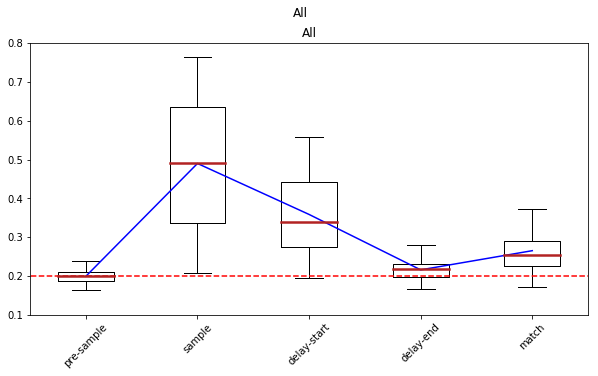

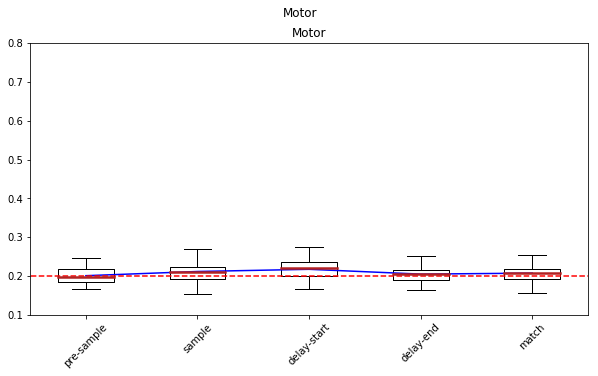

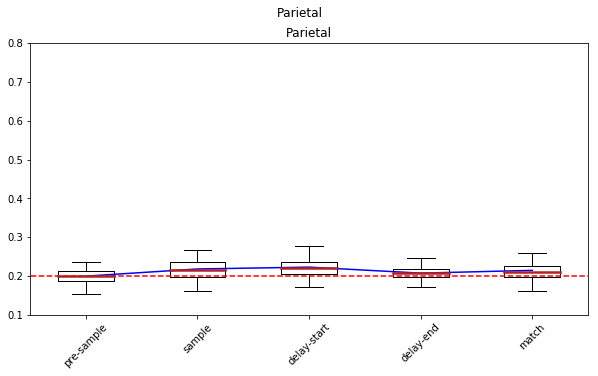

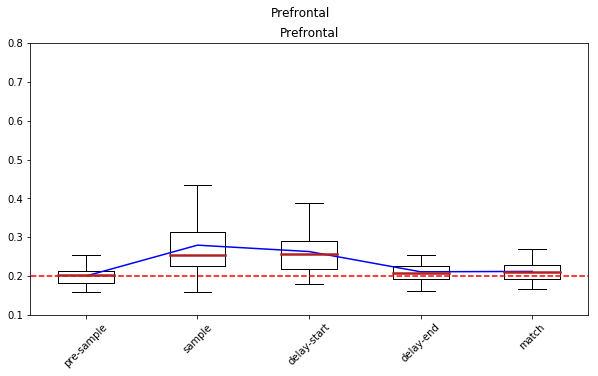

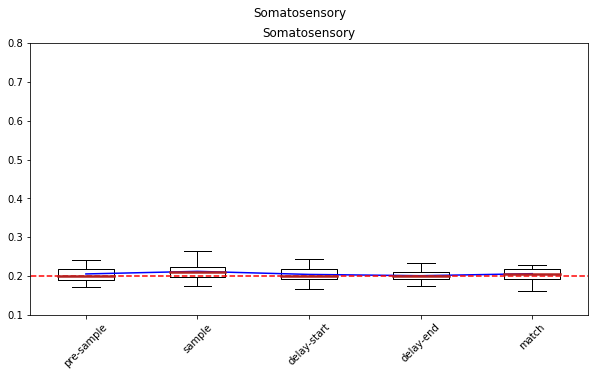

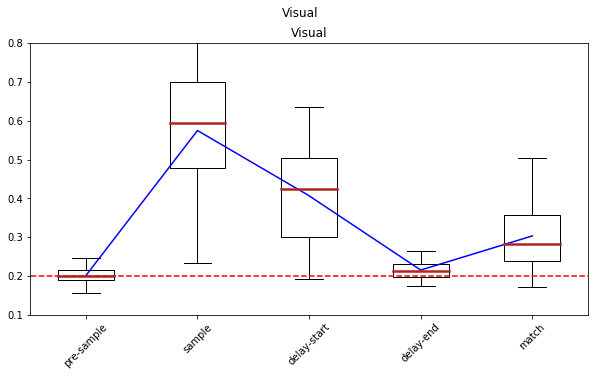

In [15]:
decode_for = 'stim' # stim or resp

if decode_for == 'stim':
    acc_random = 0.2
    ymin = 0.1
    ymax = 0.8
else :
    acc_random = 0.5
    ymin = 0.3
    ymax = 0.8

for c in cortex :
    plt.figure(figsize=(10,5))
    plt.suptitle( str(c) )

    Y = [] # recall macro

    PVAL = [] # pval calculed on acc balanced 
    for sess_no in session:
        y = len(intervals) * [0]
        missing_data = False
        for i in range(len(intervals)):
            interval = intervals[i]

            data = df[ ( df.decode_for == decode_for) & (df.cortex == c ) & (df.interval_name == interval) & (df.session == sess_no)]
            acc = data['mean_per_class_accuracy'].values
            pval = data['pval'].values
            if len(acc) !=0:
                y[i] = acc[0]
                y_pval[i] = pval[0]
            else :
                missing_data = True

        if not missing_data :

            Y.append(y)    
            PVAL.append(y_pval)

        #plt.plot(intervals, y)

    Y = np.array(Y)
    PVAL = np.array(PVAL)

    # BOXPLOT
#     num_subplot = 100 + len(frequency_band)*10 + count +1
    #print(num_subplot)
#     plt.subplot( num_subplot )

    y = np.mean(Y, axis=0)
    medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
    plt.boxplot(Y,0, '', labels= intervals, medianprops=medianprops)
    plt.xticks(rotation=45) # 
    plt.plot([1,2,3,4,5], y, 'b') # affiche la courbe de la moyenne des precisions
    plt.plot([0,6],[acc_random, acc_random],'--', color = 'red')
    #plt.plot([0,6],[acc_random+0.034, acc_random+0.034],'--', color ='green')

    plt.title( str(c) ) 
    plt.ylim(ymin, ymax)


    plt.show()



        


In [16]:
#########################################""

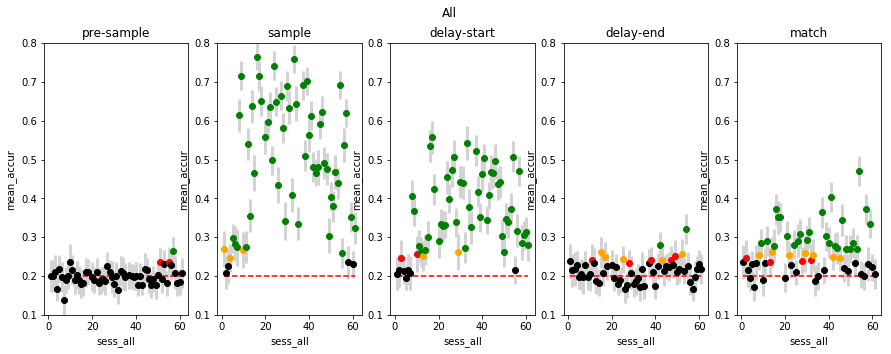

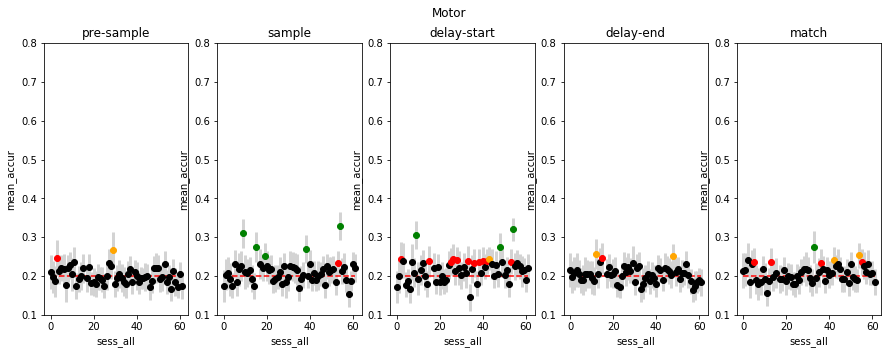

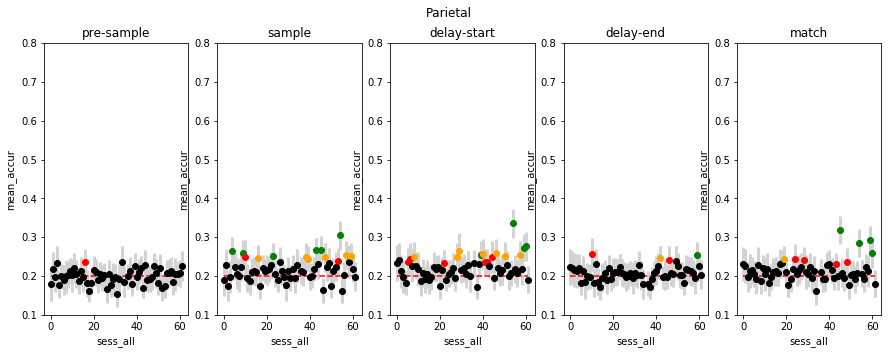

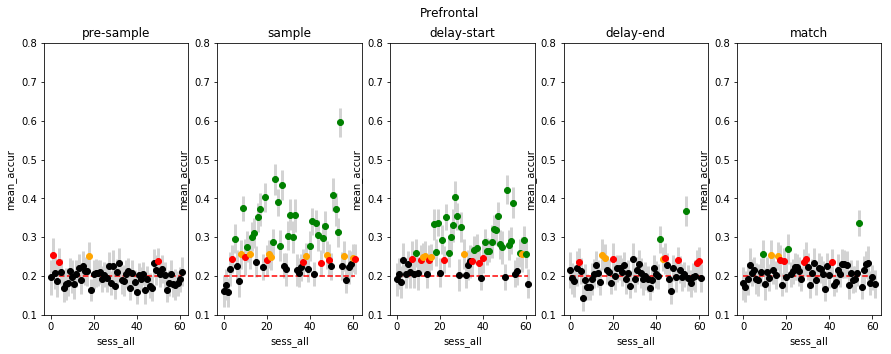

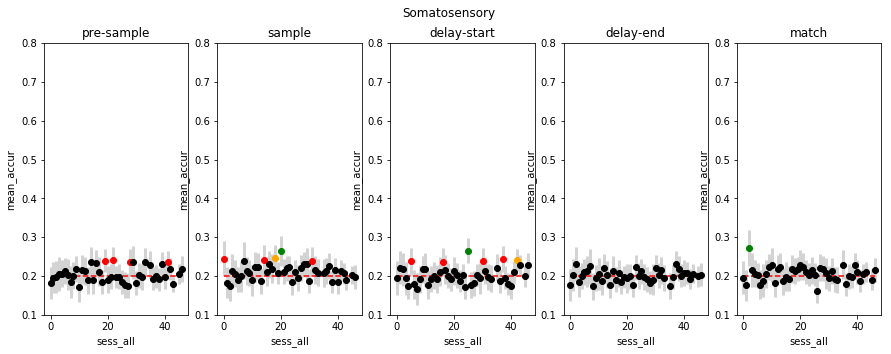

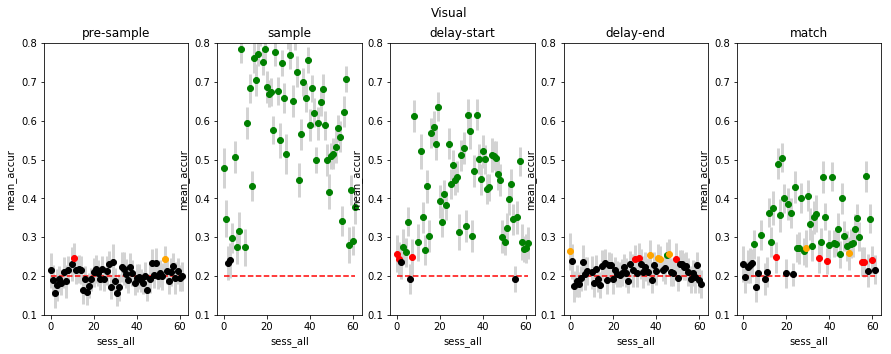

In [17]:
################ COLOR #######################
cm_order_by = 'sess_all'#'sess_available' # 'sess_available', 'acc_monkey' , 'num_electrode', 'num_trials', 'sess_all'
##############################################

decode_for = 'stim' # stim or resp

if decode_for == 'stim':
    acc_random = 0.2
    ymin = 0.1
    ymax = 0.8
else :
    acc_random = 0.5
    ymin = 0.3
    ymax = 0.8

for c in cortex :
        
    plt.figure(figsize=(15,5))
    plt.suptitle( str(c) )

    Y = [] # recall macro
    Y_std = [] # std
    PVAL = [] # pval calculed on acc balanced 
    cm_value = [] # which color for each session
    for count, sess_no in enumerate(session):
        y = len(intervals) * [0]
        y_std = len(intervals) * [0]
        y_pval= len(intervals) * [0]
        missing_data = False


        for i in range(len(intervals)):
            interval = intervals[i]

            data = df[ ( df.decode_for == decode_for) & (df.cortex == c ) &(df.interval_name == interval) & (df.session == sess_no)]
            acc = data['mean_per_class_accuracy'].values
            acc_std = data['error_bar'].values
            pval = data['pval'].values
            if len(acc) !=0:
                y[i] = acc[0]
                y_std[i] = acc_std[0]
                y_pval[i] = pval[0]


            else :
                missing_data = True

        if not missing_data :

            Y.append(y)    
            Y_std.append(y_std)
            PVAL.append(y_pval)

            if cm_order_by == 'sess_all':
                cm_value.append(count)
            elif cm_order_by =='acc_monkey':
                cm_value.append( data['acc_monkey'].values[0] )
            elif cm_order_by == 'num_electrode':
                cm_value.append( data['num_electrode'].values[0] )
            elif cm_order_by == 'num_trials':
                cm_value.append( data['num_trials'].values[0] )


        #plt.plot(intervals, y)

    Y = np.array(Y)
    Y_std = np.array(Y_std)
    PVAL = np.array(PVAL)

    if cm_order_by == 'sess_available' :
         cm_value = np.linspace(0, 1, N)
    n = Y.shape[0]
    # plot
    for count, interval in enumerate(intervals):

        num_subplot = 100 + len(intervals)*10 + count +1
        #print(num_subplot)
        plt.subplot( num_subplot )    

        #plt.scatter(cm_value, Y[:, count], color ='blue')
        #plt.errorbar(cm_value, Y[:, count],yerr=2*Y_std[:,count], linestyle="None", color ='blue')
        #plt.errorbar(cm_value, Y[:, count],yerr=2*Y_std[:,count], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
        for i in range(0,Y.shape[0]):
#                 if Y[i, count] - 2*Y_std[i,count] > acc_random : # interval de confiance à 95% ok
#                     color = 'green'
#                 elif Y[i, count] - Y_std[i,count] > acc_random : #interval de confiance à 70% ok
#                     color = 'orange'
#                 else:
#                     color ='black'
            p = PVAL[i,count] 
            color = 'green' if p < .001 else 'orange' if p < .01 else 'red' if p < .05 else 'black'
            if Y[i,count] < acc_random :
                color = 'black'

            plt.errorbar(cm_value[i], Y[i, count],yerr=2*Y_std[i,count], fmt='o', color=color, ecolor='lightgray', elinewidth=3, capsize=0)
        plt.xlabel(cm_order_by)
        plt.ylabel('mean_accur')

        plt.title(interval)

        plt.plot([np.min(cm_value), np.max(cm_value)],[acc_random, acc_random],'--', color = 'red')
        #plt.plot([np.min(cm_value), np.max(cm_value)],[acc_random+ 0.04, acc_random + 0.04],'--', color = 'green')
        plt.ylim(ymin, ymax)
    plt.show()